In [1]:
import pyemma
pyemma.__version__

import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator

Populating the interactive namespace from numpy and matplotlib


/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
model_paths = []
model_labels = []


# AA
model_paths.append('/data/isilon/rudzinski/cluster_tmp/ALA4/sim/MSM/')
model_labels.append('AA')

# MS-CG
model_paths.append('/data/isilon/rudzinski/cluster_tmp/ALA4/CGFF/full_ensemble_w14/cgsim/Prod_run/MSM/')
model_labels.append('MS-CG')

# iter-gYBG
model_paths.append('/data/isilon/rudzinski/cluster_tmp/ALA4/CGFF/iter-gYBG_w1-4/cgsim/Prod_run/MSM/')
model_labels.append('iter-gYBG')

# 2S
model_paths.append('/data/isilon/rudzinski/cluster_tmp/ALA4/CGFF/2states/SHing/MSM/')
model_labels.append('2S')

# 3S
model_paths.append('/data/isilon/rudzinski/cluster_tmp/ALA4/CGFF/3states/SHing/MSM/')
model_labels.append('3S')

# 4S
#model_paths.append('/data/isilon/rudzinski/cluster_tmp/ALA4/sim/MSM')
#model_labels.append('AA')

N_models = len(model_paths)
print N_models

5


In [3]:
# get the models
model_T = []
model_tau = []
model_mu = []
for model in range(N_models):
    model_T.append(np.load(model_paths[model]+'T.npy'))
    model_tau.append(np.load(model_paths[model]+'tau.npy'))
    model_mu.append(np.load(model_paths[model]+'mu.npy'))

In [15]:
# get the model colors
model_colors = []
model_colors.append('k')
model_colors.append('r')
model_colors.append('b')
model_colors.append('c')
model_colors.append('magenta')

In [6]:
#print dtraj_AA[:,1]

Nbins = 50

# # ax0 = dih
# min_ax0 = min(dtraj_AA[:,0])
# max_ax0 = max(dtraj_AA[:,0])
# print max_ax0
# print min_ax0
# centers_ax0 = np.linspace(min_ax0, max_ax0, num=Nbins)
# print centers_ax0
# # ax1 = 1-4
# min_ax1 = min(dtraj_AA[:,1])
# max_ax1 = max(dtraj_AA[:,1])
# print max_ax1
# print min_ax1
# centers_ax1 = np.linspace(min_ax1, max_ax1, num=Nbins)
# print centers_ax1

# centers = [centers_ax0, centers_ax1]
# print np.array(centers).shape

centers = np.squeeze(np.load('binctrs_50x50bins.npy'))
print centers

[[-179.998      -172.65112245 -165.3042449  -157.95736735 -150.6104898
  -143.26361224 -135.91673469 -128.56985714 -121.22297959 -113.87610204
  -106.52922449  -99.18234694  -91.83546939  -84.48859184  -77.14171429
   -69.79483673  -62.44795918  -55.10108163  -47.75420408  -40.40732653
   -33.06044898  -25.71357143  -18.36669388  -11.01981633   -3.67293878
     3.67393878   11.02081633   18.36769388   25.71457143   33.06144898
    40.40832653   47.75520408   55.10208163   62.44895918   69.79583673
    77.14271429   84.48959184   91.83646939   99.18334694  106.53022449
   113.87710204  121.22397959  128.57085714  135.91773469  143.26461224
   150.6114898   157.95836735  165.3052449   172.65212245  179.999     ]
 [   0.37716       0.39252694    0.40789388    0.42326082    0.43862776
     0.45399469    0.46936163    0.48472857    0.50009551    0.51546245
     0.53082939    0.54619633    0.56156327    0.5769302     0.59229714
     0.60766408    0.62303102    0.63839796    0.6537649     0.6

In [9]:
# functions for transforming between bins and labels
def values_to_bins(x,y,xmin,ymin,dx,dy):
    xgrid = int( np.floor( (x - xmin) / dx ) ) 
    ygrid = int( np.floor( (y - ymin) / dy ) ) 
    return xgrid, ygrid

def bins_to_label(xgrid,ygrid,nx):
    label = xgrid + ygrid*nx 
    return label

def label_to_bins(label,nx):
    xgrid = label % nx
    ygrid = (label - xgrid) / nx
    return xgrid, ygrid

def bins_to_values(xgrid, ygrid, values):
    values_x = values[0][xgrid]
    values_y = values[1][ygrid]
    return values_x, values_y

In [78]:
# get the full set of labels
values_to_bins(centers[0],centers[1],centers[0][0],centers[1][0],centers[0][1]-centers[0][0],centers[1][1]-centers[1][0])
#bins_to_label(centers[0],centers[1],Nbins)

TypeError: only size-1 arrays can be converted to Python scalars

In [30]:
# get the eigenvalues
model_evals = []
for model in range(N_models):
    model_evals.append( np.real(eigenvalues(model_T[model],k=10)) )

[None, None, None, None, None]

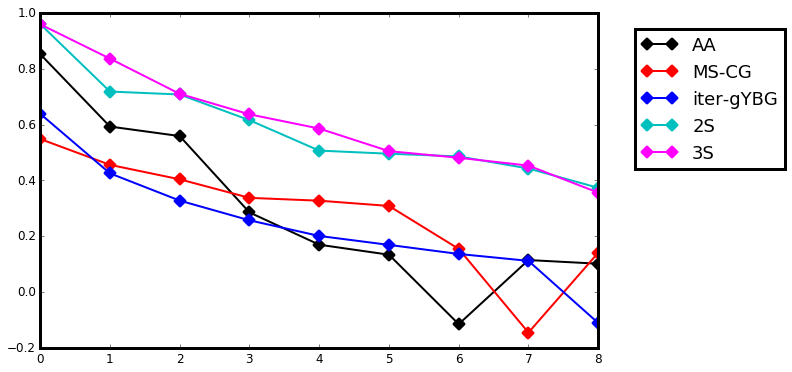

In [31]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for model in range(N_models):
    plt.plot(model_evals[model][1:],marker='x',color=model_colors[model],label=model_labels[model],linewidth=2.,mew=10)
    
    
ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='18',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

[None, None, None, None, None]

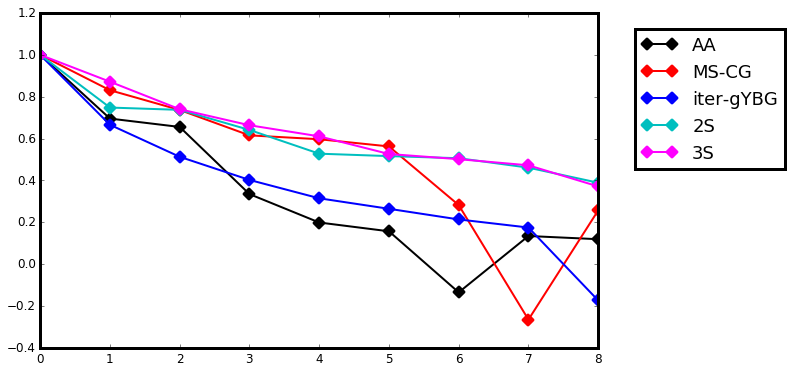

In [32]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for model in range(N_models):
    plt.plot(model_evals[model][1:]/model_evals[model][1],marker='x',color=model_colors[model],label=model_labels[model],linewidth=2.,mew=10)
    
    
ax.spines['left'].set_linewidth(3.0)
ax.spines['right'].set_linewidth(3.0)
ax.spines['top'].set_linewidth(3.0)
ax.spines['bottom'].set_linewidth(3.0)

# legend
plt.legend()
legend = plt.legend(fontsize='18',loc='upper center', bbox_to_anchor=(1.2, 0.98))
frame = legend.get_frame()
frame.set_linewidth('3.0')
ltext = legend.get_texts()
plt.setp(ltext, fontweight='normal')

In [188]:
# get the evecs
model_evecs = []
for model in range(N_models):
    model_evecs.append( eigenvectors(model_T[model],k=5) )

In [204]:
# align the signs by hand
model_signs = []
model_signs.append([1.,1.,1.,1.,1.])
model_signs.append([1.,1.,-1.,-1.,1.])
model_signs.append([1.,1.,1.,1.,1.])
model_signs.append([1.,1.,1.,1.,1.])
model_signs.append([1.,1.,1.,-1.,1.])

In [190]:
# normalize the evecs
Nevecs = 5
for model in range(N_models):
    for evec in range(Nevecs):
        model_evecs[model][:,evec] = model_evecs[model][:,evec] / np.sum(model_evecs[model][:,evec])

In [191]:
# get the bin centers
bin_ctrs_trim = []
grids_trim = []
for model in range(N_models):
    bin_ctrs_trim.append( np.load(model_paths[model]+'bin_ctrs_trim.npy') )
    grids_trim.append( np.load(model_paths[model]+'grids_trim.npy') )

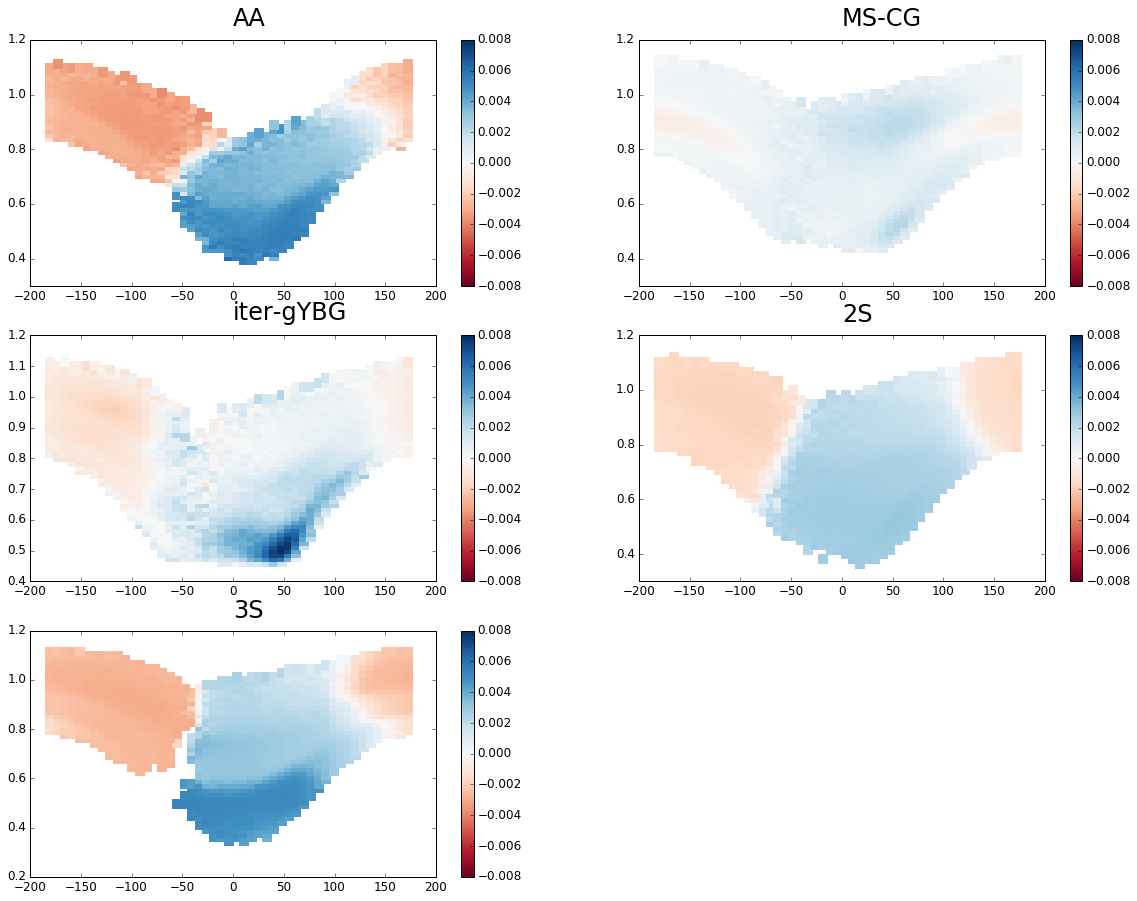

In [196]:
fig = plt.figure(figsize=(20,15))

evec_index = 1
for model in range(5):
    plt.subplot(3, 2, model+1)    
    plt.scatter(bin_ctrs_trim[model][0], bin_ctrs_trim[model][1],s=100,c=model_signs[model][evec_index]*model_evecs[model][:,evec_index],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.008,vmax=0.008)
    plt.colorbar()
    plt.text(0.,1.25,model_labels[model],fontsize=24)
plt.show()

In [203]:
fig = plt.figure(figsize=(20,15))

evec_index = 2
for model in range(5):
    plt.subplot(3, 2, model+1)    
    plt.scatter(bin_ctrs_trim[model][0], bin_ctrs_trim[model][1],s=100,c=model_signs[model][evec_index]*model_evecs[model][:,evec_index],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.008,vmax=0.008)
    plt.colorbar()
    plt.text(0.,1.25,model_labels[model],fontsize=24)
plt.show()

In [205]:
fig = plt.figure(figsize=(20,15))

evec_index = 3
for model in range(5):
    plt.subplot(3, 2, model+1)    
    plt.scatter(bin_ctrs_trim[model][0], bin_ctrs_trim[model][1],s=100,c=model_signs[model][evec_index]*model_evecs[model][:,evec_index],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.008,vmax=0.008)
    plt.colorbar()
    plt.text(0.,1.25,model_labels[model],fontsize=24)
plt.show()

In [263]:
PCCA = np.load(model_paths[0]+'PCCA_4state.npz')
lcc_AA = np.load(model_paths[0]+'lcc_trim_AA.npy')
MSSs = [] # in global labels!
MSSs.append(lcc_AA[PCCA['H']])
MSSs.append(lcc_AA[PCCA['I']])
MSSs.append(lcc_AA[PCCA['E1']])
MSSs.append(lcc_AA[PCCA['E2']])

In [264]:
N_MSSs = len(MSSs)
print N_MSSs

4


In [265]:
# get the transformation to global labels for each model
lcc_trim = []
for model in range(len(models)):
    lcc_trim.append(model_paths[model]+'lcc_trim.npy')

array([ 868,  966, 1014, 1015, 1016, 1017, 1018, 1062, 1063, 1064, 1065,
       1067, 1112, 1113, 1114, 1115, 1116, 1161, 1162, 1163, 1164, 1165,
       1166, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1259, 1260, 1261,
       1262, 1263, 1264, 1308, 1309, 1310, 1311, 1312, 1313, 1357, 1358,
       1359, 1360, 1361, 1362, 1405, 1406, 1407, 1408, 1409, 1410, 1411,
       1447, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1495,
       1496, 1497, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508,
       1509, 1510, 1545, 1546, 1547, 1548, 1550, 1551, 1552, 1553, 1554,
       1555, 1556, 1557, 1558, 1559, 1596, 1597, 1598, 1600, 1601, 1602,
       1603, 1604, 1605, 1606, 1607, 1608, 1646, 1647, 1648, 1650, 1651,
       1652, 1653, 1654, 1655, 1656, 1657, 1658, 1697, 1698, 1700, 1701,
       1702, 1703, 1704, 1705, 1706, 1707, 1747, 1748, 1750, 1751, 1752,
       1753, 1754, 1755, 1756, 1797, 1798, 1800, 1801, 1802, 1803, 1804,
       1848, 1850, 1851, 1852, 1853, 1897, 1898, 19

In [208]:
# get the AA bins for each MSS substate -- from AA label to AA bin
MSS_xbin = [[] for x in range(N_MSSs)]
MSS_ybin = [[] for x in range(N_MSSs)]
for mss in range(N_MSSs):
    MSS_xbin[mss], MSS_ybin[mss] = label_to_bins(MSSs[mss],Nbins)

# get the 
#xgrids_trim, ygrids_trim = label_to_bins(lcc_trim_AA,ngridsx)
#bin_ctrs_x_trim, bin_ctrs_y_trim = bins_to_values(xgrids_trim, ygrids_trim, bin_ctrs)

In [212]:
# Now transform these to the global bins -- AA bin to global bin
MSS_xbin_glob = [[] for x in range(N_MSSs)]
MSS_ybin_glob = [[] for x in range(N_MSSs)]
for mss in range(N_MSSs):
    MSS_xbin_glob[mss] = grids_trim[0][0][MSS_xbin[mss]]
    MSS_ybin_glob[mss] = grids_trim[0][1][MSS_ybin[mss]]

# AA bin to global bin
# xbin_glob = grids_trim[0][0][xbin]
# xbin_glob

In [246]:
# Now, construct the MSSs for each other model
model_MSSs = []
for model in range(N_models):
    model_MSSs.append([])
    for mss in range(N_MSSs):
        model_MSSs[model].append([])
        for substate in range(len(MSSs[mss])):
            #try: # see if the substate is in the current model
            tmp = np.where( lcc_trim[model] == MSSs[mss][substate] )[0]
            #tmp = np.where( np.all(grids_trim[model].T==np.array([MSS_xbin_glob[mss][substate],MSS_ybin_glob[mss][substate]]),axis=1) == True )[0]
            if (len(tmp) != 0):
                index = tmp[0]
                model_MSSs[model][mss].append(index)

In [236]:
# try for the global values
MSSs_glob = []
for mss in range(N_MSSs):
    MSSs_glob.append([])
    for substate in range(len(MSSs[mss])):
        #try: # see if the substate is in the current model
        tmp = np.where( np.all(grids_trim[model].T==np.array([MSS_xbin_glob[mss][substate],MSS_ybin_glob[mss][substate]]),axis=1) == True )[0]
        if (len(tmp) != 0):
            index = tmp[0]
            model_MSSs[model][mss].append(index)

0

In [254]:
print len(model_MSSs[0][1])
print len(MSSs[1])

287
320


In [230]:
np.where( np.all(grids_trim[0].T==np.array([MSS_xbin_glob[0][0],MSS_ybin_glob[0][0]]),axis=1) == True )[0][0]

6

In [232]:
grids_trim[0].T.shape

(1182, 2)

In [ ]:
plt.scatter(bin_ctrs_x_trim[0], bin_ctrs_y_trim[0],s=100,c=membership[:,0],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

In [243]:
plt.scatter(bin_ctrs_trim[0][0][MSSs[0]],bin_ctrs_trim[0][1][MSSs[0]],color='b',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_trim[0][0][MSSs[1]],bin_ctrs_trim[0][1][MSSs[1]],color='g',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_trim[0][0][MSSs[2]],bin_ctrs_trim[0][1][MSSs[2]],color='r',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_trim[0][0][MSSs[3]],bin_ctrs_trim[0][1][MSSs[3]],color='k',s=150,marker='s',linewidth=0.0)
plt.show()

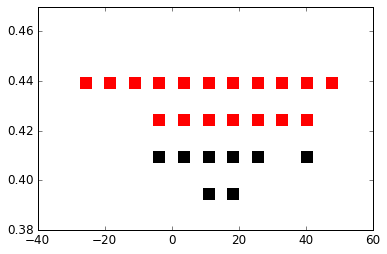

In [247]:
plt.scatter(bin_ctrs_trim[0][0][model_MSSs[0][0]],bin_ctrs_trim[0][1][model_MSSs[0][0]],color='b',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_trim[0][0][model_MSSs[0][1]],bin_ctrs_trim[0][1][model_MSSs[0][1]],color='g',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_trim[0][0][model_MSSs[0][2]],bin_ctrs_trim[0][1][model_MSSs[0][2]],color='r',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_trim[0][0][model_MSSs[0][3]],bin_ctrs_trim[0][1][model_MSSs[0][3]],color='k',s=150,marker='s',linewidth=0.0)
plt.show()

[-180.         -172.65306122 -165.30612245 -157.95918367 -150.6122449
 -143.26530612 -135.91836735 -128.57142857 -121.2244898  -113.87755102
 -106.53061224  -99.18367347  -91.83673469  -84.48979592  -77.14285714
  -69.79591837  -62.44897959  -55.10204082  -47.75510204  -40.40816327
  -33.06122449  -25.71428571  -18.36734694  -11.02040816   -3.67346939
    3.67346939   11.02040816   18.36734694   25.71428571   33.06122449
   40.40816327   47.75510204   55.10204082   62.44897959   69.79591837
   77.14285714   84.48979592   91.83673469   99.18367347  106.53061224
  113.87755102  121.2244898   128.57142857  135.91836735  143.26530612
  150.6122449   157.95918367  165.30612245  172.65306122]
[0.44037592 0.45558122 0.47078653 0.48599184 0.50119714 0.51640245
 0.53160776 0.54681306 0.56201837 0.57722367 0.59242898 0.60763429
 0.62283959 0.6380449  0.6532502  0.66845551 0.68366082 0.69886612
 0.71407143 0.72927673 0.74448204 0.75968735 0.77489265 0.79009796
 0.80530327 0.82050857 0.83571388 0.

In [39]:
print centers[0].size
print centers[1].size
print T_AA.shape
print bin_ctrs_x_trim.size
print membership[:,0]
#pi_AA_M = np.reshape(pi_AA, (centers[0].size,centers[1].size))

49
46
(1475, 1475)
1475
[0.14039941 0.14278308 0.07153844 ... 0.0898168  0.02402361 0.00997346]


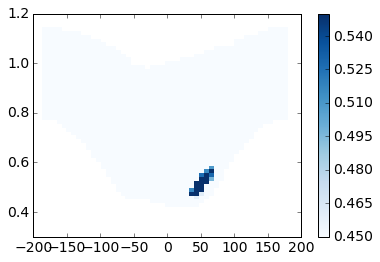

In [40]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,0],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

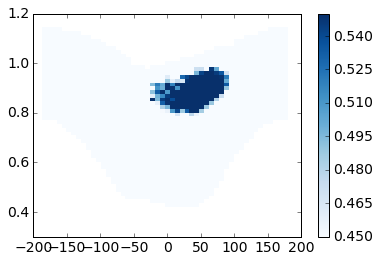

In [41]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,1],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

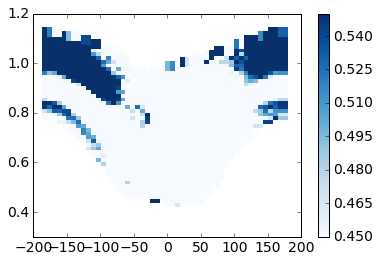

In [42]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,2],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

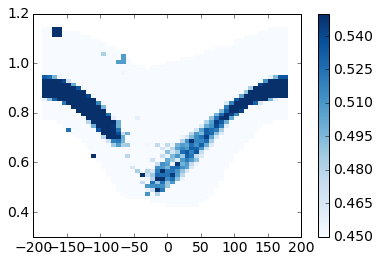

In [43]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,3],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

In [44]:
# define the metastable states by label
E2 = np.where(membership[:,0]>0.5)
E1 = np.where(membership[:,1]>0.5)
H = np.where(membership[:,2]>0.5)
I = np.where(membership[:,3]>0.5)

In [45]:
# make sure there is no overlap
check = [val for val in E2[0] if val in I[0]]
print check 
check = [val for val in E2[0] if val in E1[0]]
print check 
check = [val for val in E2[0] if val in H[0]]
print check 

[]
[]
[]


In [46]:
# get the grids for each set
xgrids_I, ygrids_I = label_to_bins(lcc_trim_AA[I[0]],ngridsx)
bin_ctrs_x_I, bin_ctrs_y_I = bins_to_values(xgrids_I, ygrids_I, bin_ctrs)

xgrids_E2, ygrids_E2 = label_to_bins(lcc_trim_AA[E2[0]],ngridsx)
bin_ctrs_x_E2, bin_ctrs_y_E2 = bins_to_values(xgrids_E2, ygrids_E2, bin_ctrs)

xgrids_H, ygrids_H = label_to_bins(lcc_trim_AA[H[0]],ngridsx)
bin_ctrs_x_H, bin_ctrs_y_H = bins_to_values(xgrids_H, ygrids_H, bin_ctrs)

xgrids_E1, ygrids_E1 = label_to_bins(lcc_trim_AA[E1[0]],ngridsx)
bin_ctrs_x_E1, bin_ctrs_y_E1 = bins_to_values(xgrids_E1, ygrids_E1, bin_ctrs)

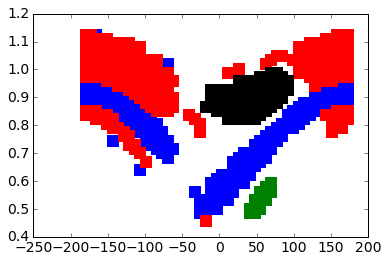

In [47]:
plt.scatter(bin_ctrs_x_I, bin_ctrs_y_I,color='b',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_E2, bin_ctrs_y_E2,color='g',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_H, bin_ctrs_y_H,color='r',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_E1, bin_ctrs_y_E1,color='k',s=150,marker='s',linewidth=0.0)
plt.show()

In [48]:
#from pyemma.msm.analysis import mfpt
from msmtools.analysis import mfpt

In [49]:
m_t_H_I = mfpt(T_AA,I[0],origin=H[0])
m_t_H_E1 = mfpt(T_AA,E1[0],origin=H[0])
m_t_H_E2 = mfpt(T_AA,E2[0],origin=H[0])

m_t_I_E1 = mfpt(T_AA,E1[0],origin=I[0])
m_t_I_E2 = mfpt(T_AA,E2[0],origin=I[0])
m_t_I_H = mfpt(T_AA,H[0],origin=I[0])

m_t_E1_E2 = mfpt(T_AA,E2[0],origin=E1[0])
m_t_E1_I = mfpt(T_AA,I[0],origin=E1[0])
m_t_E1_H = mfpt(T_AA,H[0],origin=E1[0])

m_t_E2_E1 = mfpt(T_AA,E1[0],origin=E2[0])
m_t_E2_I = mfpt(T_AA,I[0],origin=E2[0])
m_t_E2_H = mfpt(T_AA,H[0],origin=E2[0])

In [50]:
print m_t_H_I 
print m_t_H_E1 
print m_t_H_E2
print '\n'
print m_t_I_E1 
print m_t_I_E2 
print m_t_I_H 
print '\n'
print m_t_E1_E2 
print m_t_E1_I 
print m_t_E1_H 
print '\n'
print m_t_E2_E1 
print m_t_E2_I 
print m_t_E2_H 

2.8563206152971623
56.497042978361165
341.2297402932826


58.46966440044167
341.6967180624033
9.095707263318609


338.5766246869919
3.530102667569342
7.917292963203434


55.32259466396934
3.4505140519925317
9.298166794341718
